In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats import multitest

# Why do I always fucking forget how to do this. There should be a global default.
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)

#200 generations ; 4 models ; alpha 2000 ro 7000 ; m 0.001 or 0.01 ; s 0.001 or 0.01
# J 1000; point_mutation; all defaults otherwise
# ecological strength 1
# Testing array VS non array
arr_mean = pd.read_csv("../../array_mean/SIMOUT.txt", sep="\t", header=0)
arr_pw = pd.read_csv("../../array_pw/SIMOUT.txt", sep="\t", header=0)
arr_neutral = pd.read_csv("../../array_neutral/SIMOUT.txt", sep="\t", header=0)
arr_filtering = pd.read_csv("../../array_filtering/SIMOUT.txt", sep="\t", header=0)
noarr_mean = pd.read_csv("../../noarray_mean/SIMOUT.txt", sep="\t", header=0)
noarr_pw = pd.read_csv("../../noarray_pw/SIMOUT.txt", sep="\t", header=0)
noarr_neutral = pd.read_csv("../../noarray_neutral/SIMOUT.txt", sep="\t", header=0)
noarr_filtering = pd.read_csv("../../noarray_filtering/SIMOUT.txt", sep="\t", header=0)

print(arr_mean.shape, noarr_mean.shape, arr_neutral.shape, noarr_neutral.shape)
print(noarr_pw.shape, arr_pw.shape)

(160, 81) (160, 81) (210, 81) (210, 81)
(160, 81) (160, 81)


In [22]:
# Compute pvalues for differences in summary statistics
# With Bonferroni correction for multiple testing
ttvals_mean, ttres_mean = stats.ttest_ind(arr_mean.iloc[:, 21:], noarr_mean.iloc[:, 21:])
ttres_mean = multitest.multipletests(ttres_mean,method='bonferroni')

ttvals_pw, ttres_pw = stats.ttest_ind(arr_pw.iloc[:, 21:], noarr_pw.iloc[:, 21:])
ttres_pw = multitest.multipletests(ttres_pw,method='bonferroni')

ttvals_neutral, ttres_neutral = stats.ttest_ind(arr_neutral.iloc[:, 21:], noarr_neutral.iloc[:, 21:])
ttres_neutral = multitest.multipletests(ttres_neutral,method='bonferroni')

ttvals_filtering, ttres_filtering = stats.ttest_ind(arr_filtering.iloc[:, 21:], noarr_filtering.iloc[:, 21:])
ttres_filtering = multitest.multipletests(ttres_filtering,method='bonferroni')

print(len(ttres_pw[1]))
print(len(noarr_pw.columns[21:]))
col = noarr_pw.columns[21:]
print(col[ttres_pw[1]<0.9])

60
60
Index(['kurtosis_regional_traits', 'reg_loc_std_trait_dif',
       'reg_loc_iqr_trait_dif'],
      dtype='object')


/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/juliette/miniconda3/envs/MESS/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


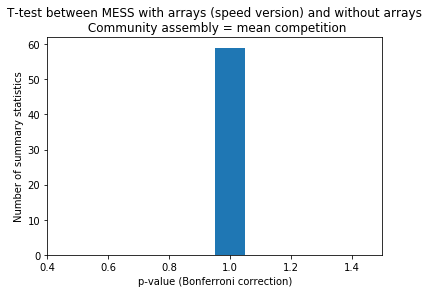

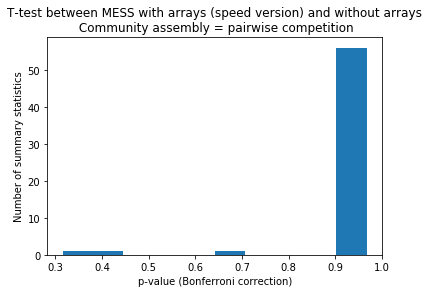

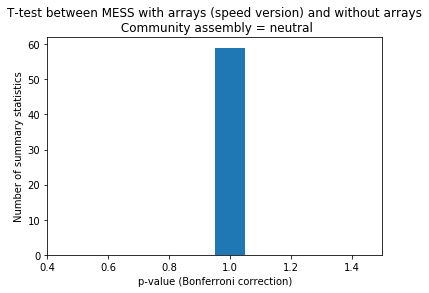

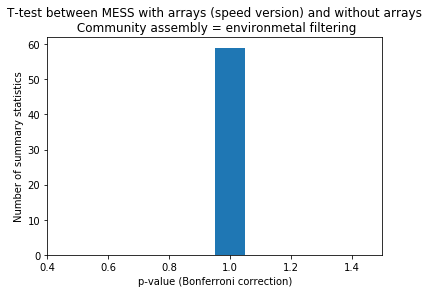

In [3]:
plt.hist(ttres_mean[1],align='left')
plt.xlabel("p-value (Bonferroni correction)")
plt.ylabel("Number of summary statistics")
plt.title("T-test between MESS with arrays (speed version) and without arrays\n Community assembly = mean competition")
plt.show()
plt.close()

plt.hist(ttres_pw[1], align='left')
plt.xlabel("p-value (Bonferroni correction)")
plt.ylabel("Number of summary statistics")
plt.title("T-test between MESS with arrays (speed version) and without arrays\n Community assembly = pairwise competition")
plt.show()
plt.close()

plt.hist(ttres_neutral[1], align='left')
plt.xlabel("p-value (Bonferroni correction)")
plt.ylabel("Number of summary statistics")
plt.title("T-test between MESS with arrays (speed version) and without arrays\n Community assembly = neutral")
plt.show()
plt.close()

plt.hist(ttres_filtering[1], align='left')
plt.xlabel("p-value (Bonferroni correction)")
plt.ylabel("Number of summary statistics")
plt.title("T-test between MESS with arrays (speed version) and without arrays\n Community assembly = environmetal filtering")
plt.show()
plt.close()

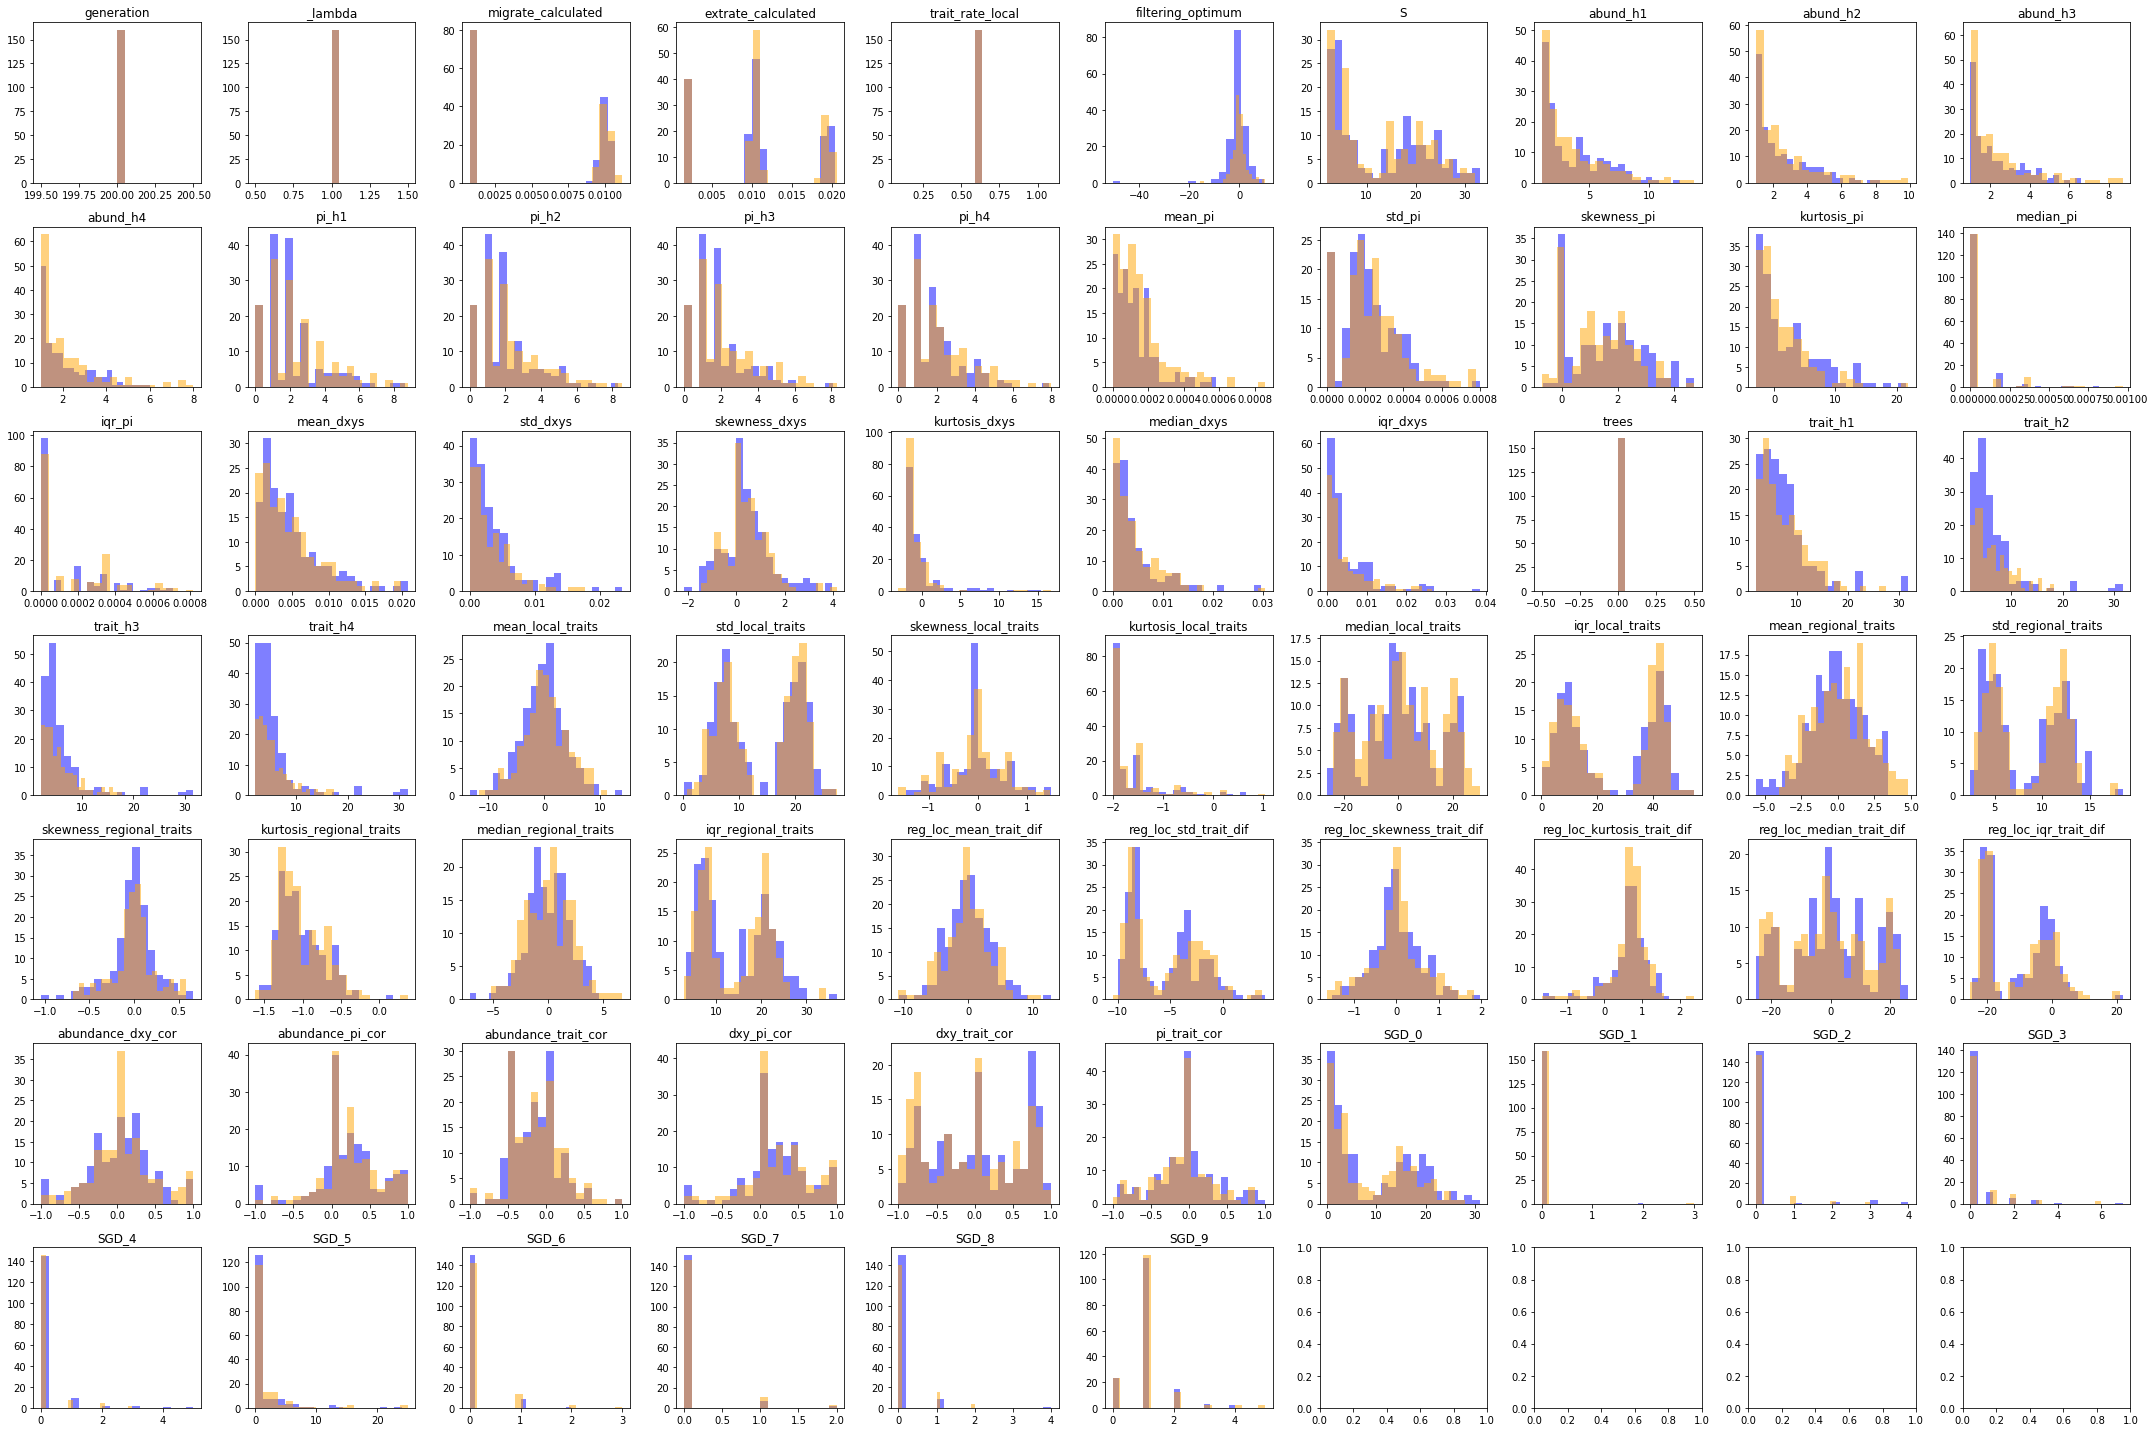

In [38]:
# MEAN
# Array is blue
# No array is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(arr_mean.columns)[15:], axs):
    ax.hist(arr_mean[p], color='blue', bins=20, alpha=0.5)
    ax.hist(noarr_mean[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

# On observe des distributions multi modales -> Les autres variations de paramètres ont changé quelque chose !!

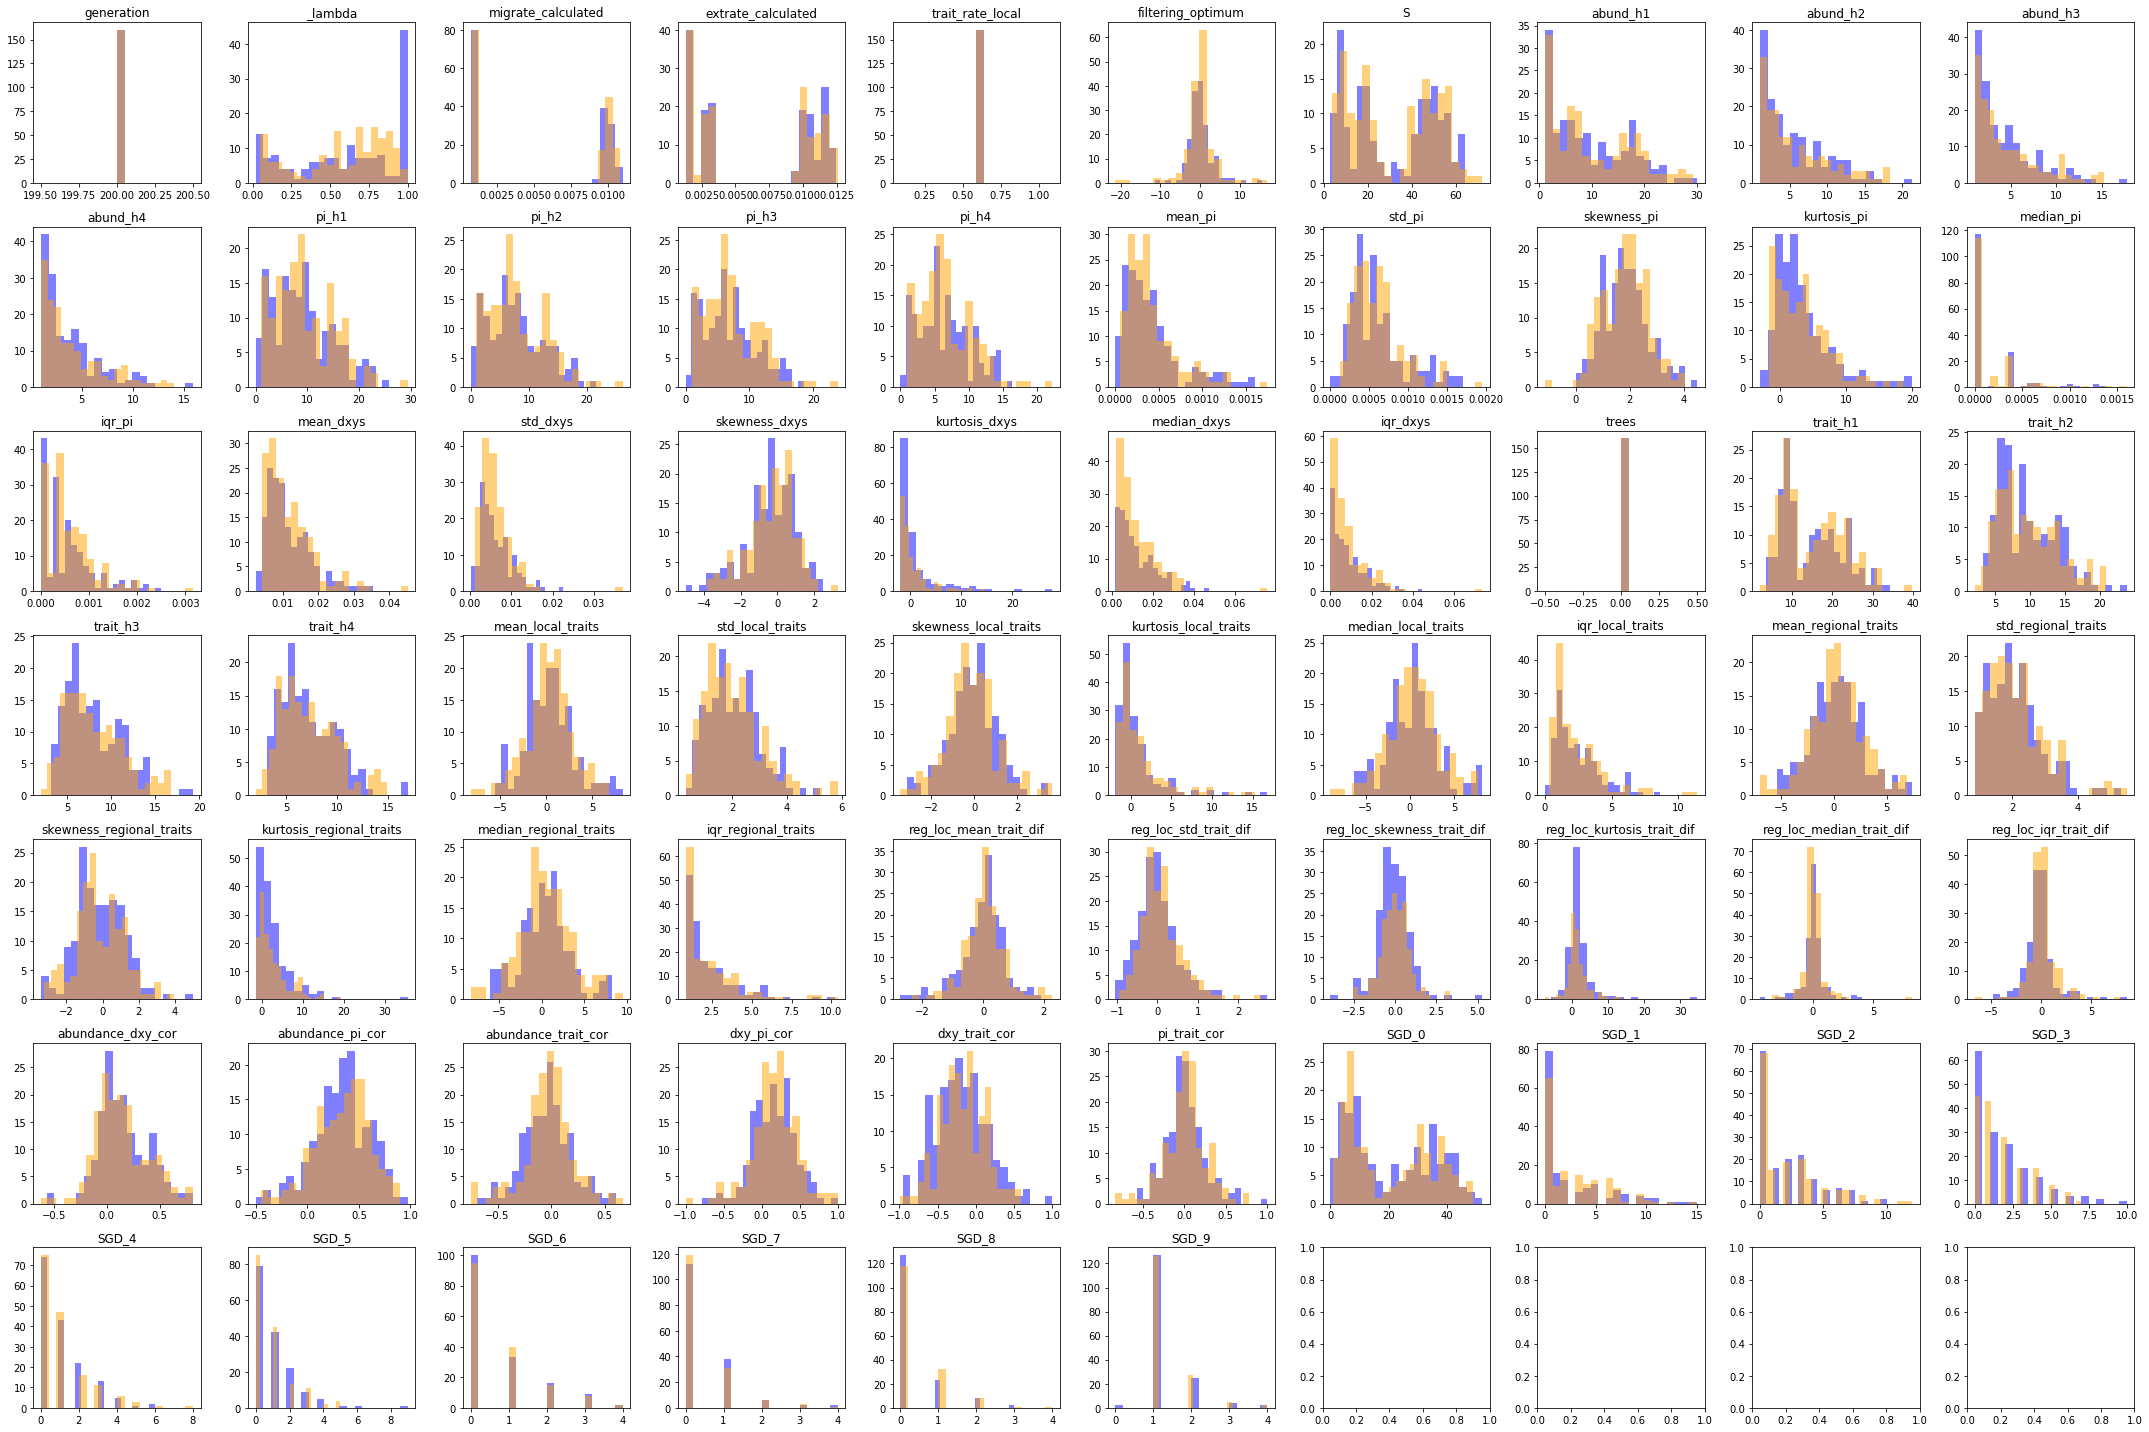

In [39]:
# NEUTRAL
# Array is blue
# No array is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(arr_neutral.columns)[15:], axs):
    ax.hist(arr_neutral[p], color='blue', bins=20, alpha=0.5)
    ax.hist(noarr_neutral[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

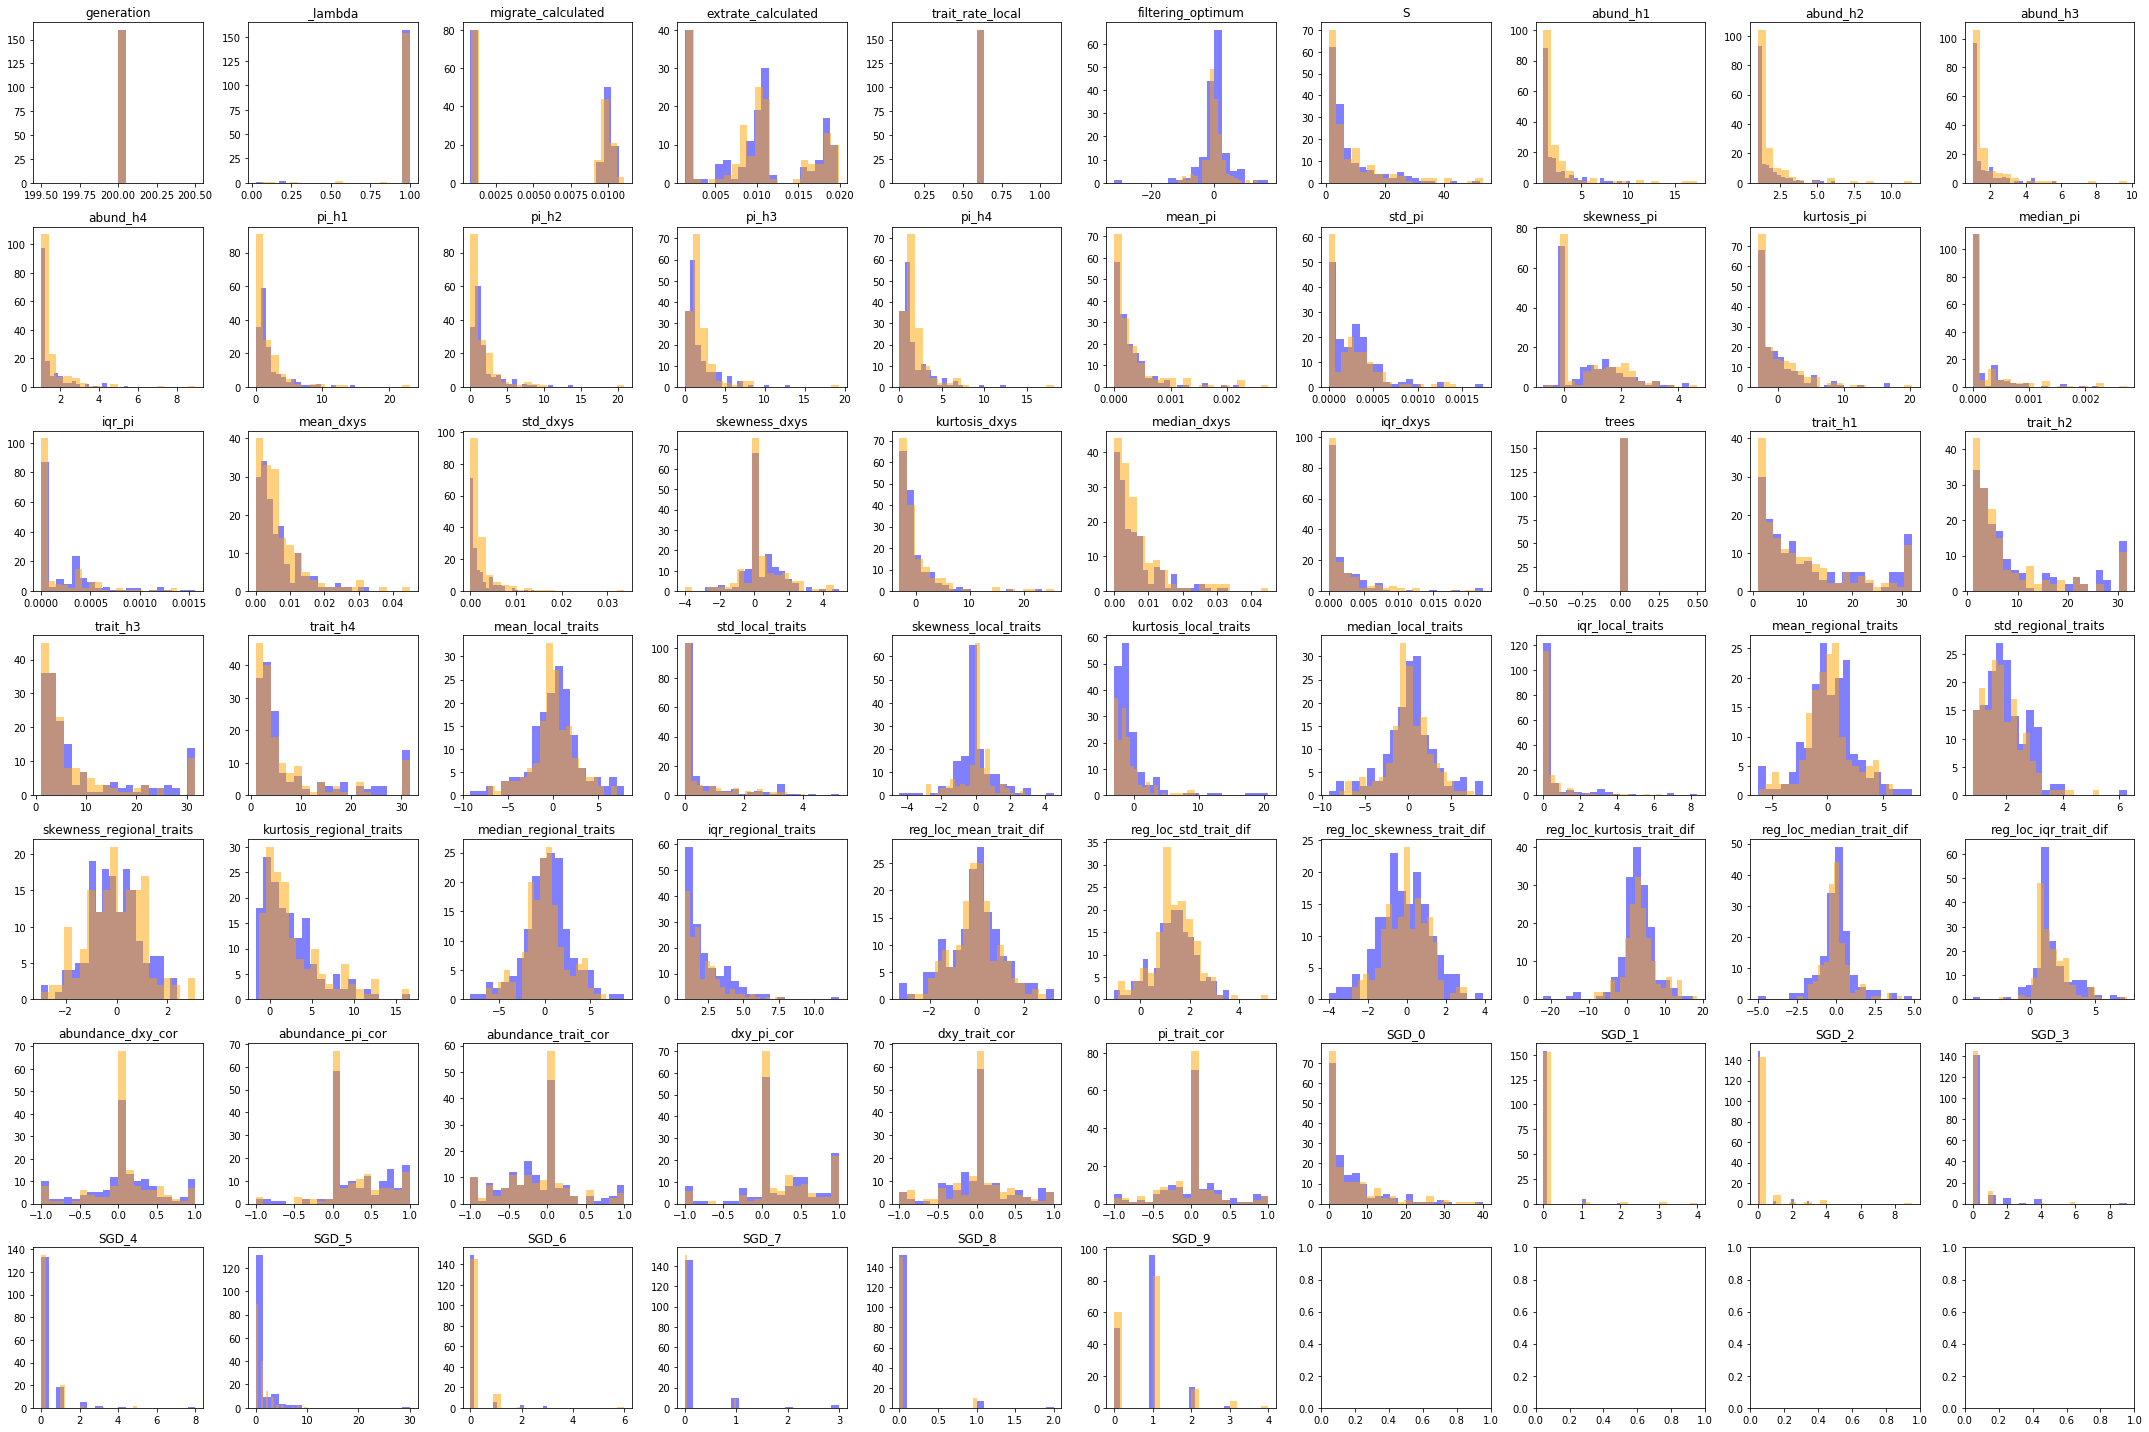

In [40]:
# FILTERING
# Array is blue
# No array is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(arr_filtering.columns)[15:], axs):
    ax.hist(arr_filtering[p], color='blue', bins=20, alpha=0.5)
    ax.hist(noarr_filtering[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

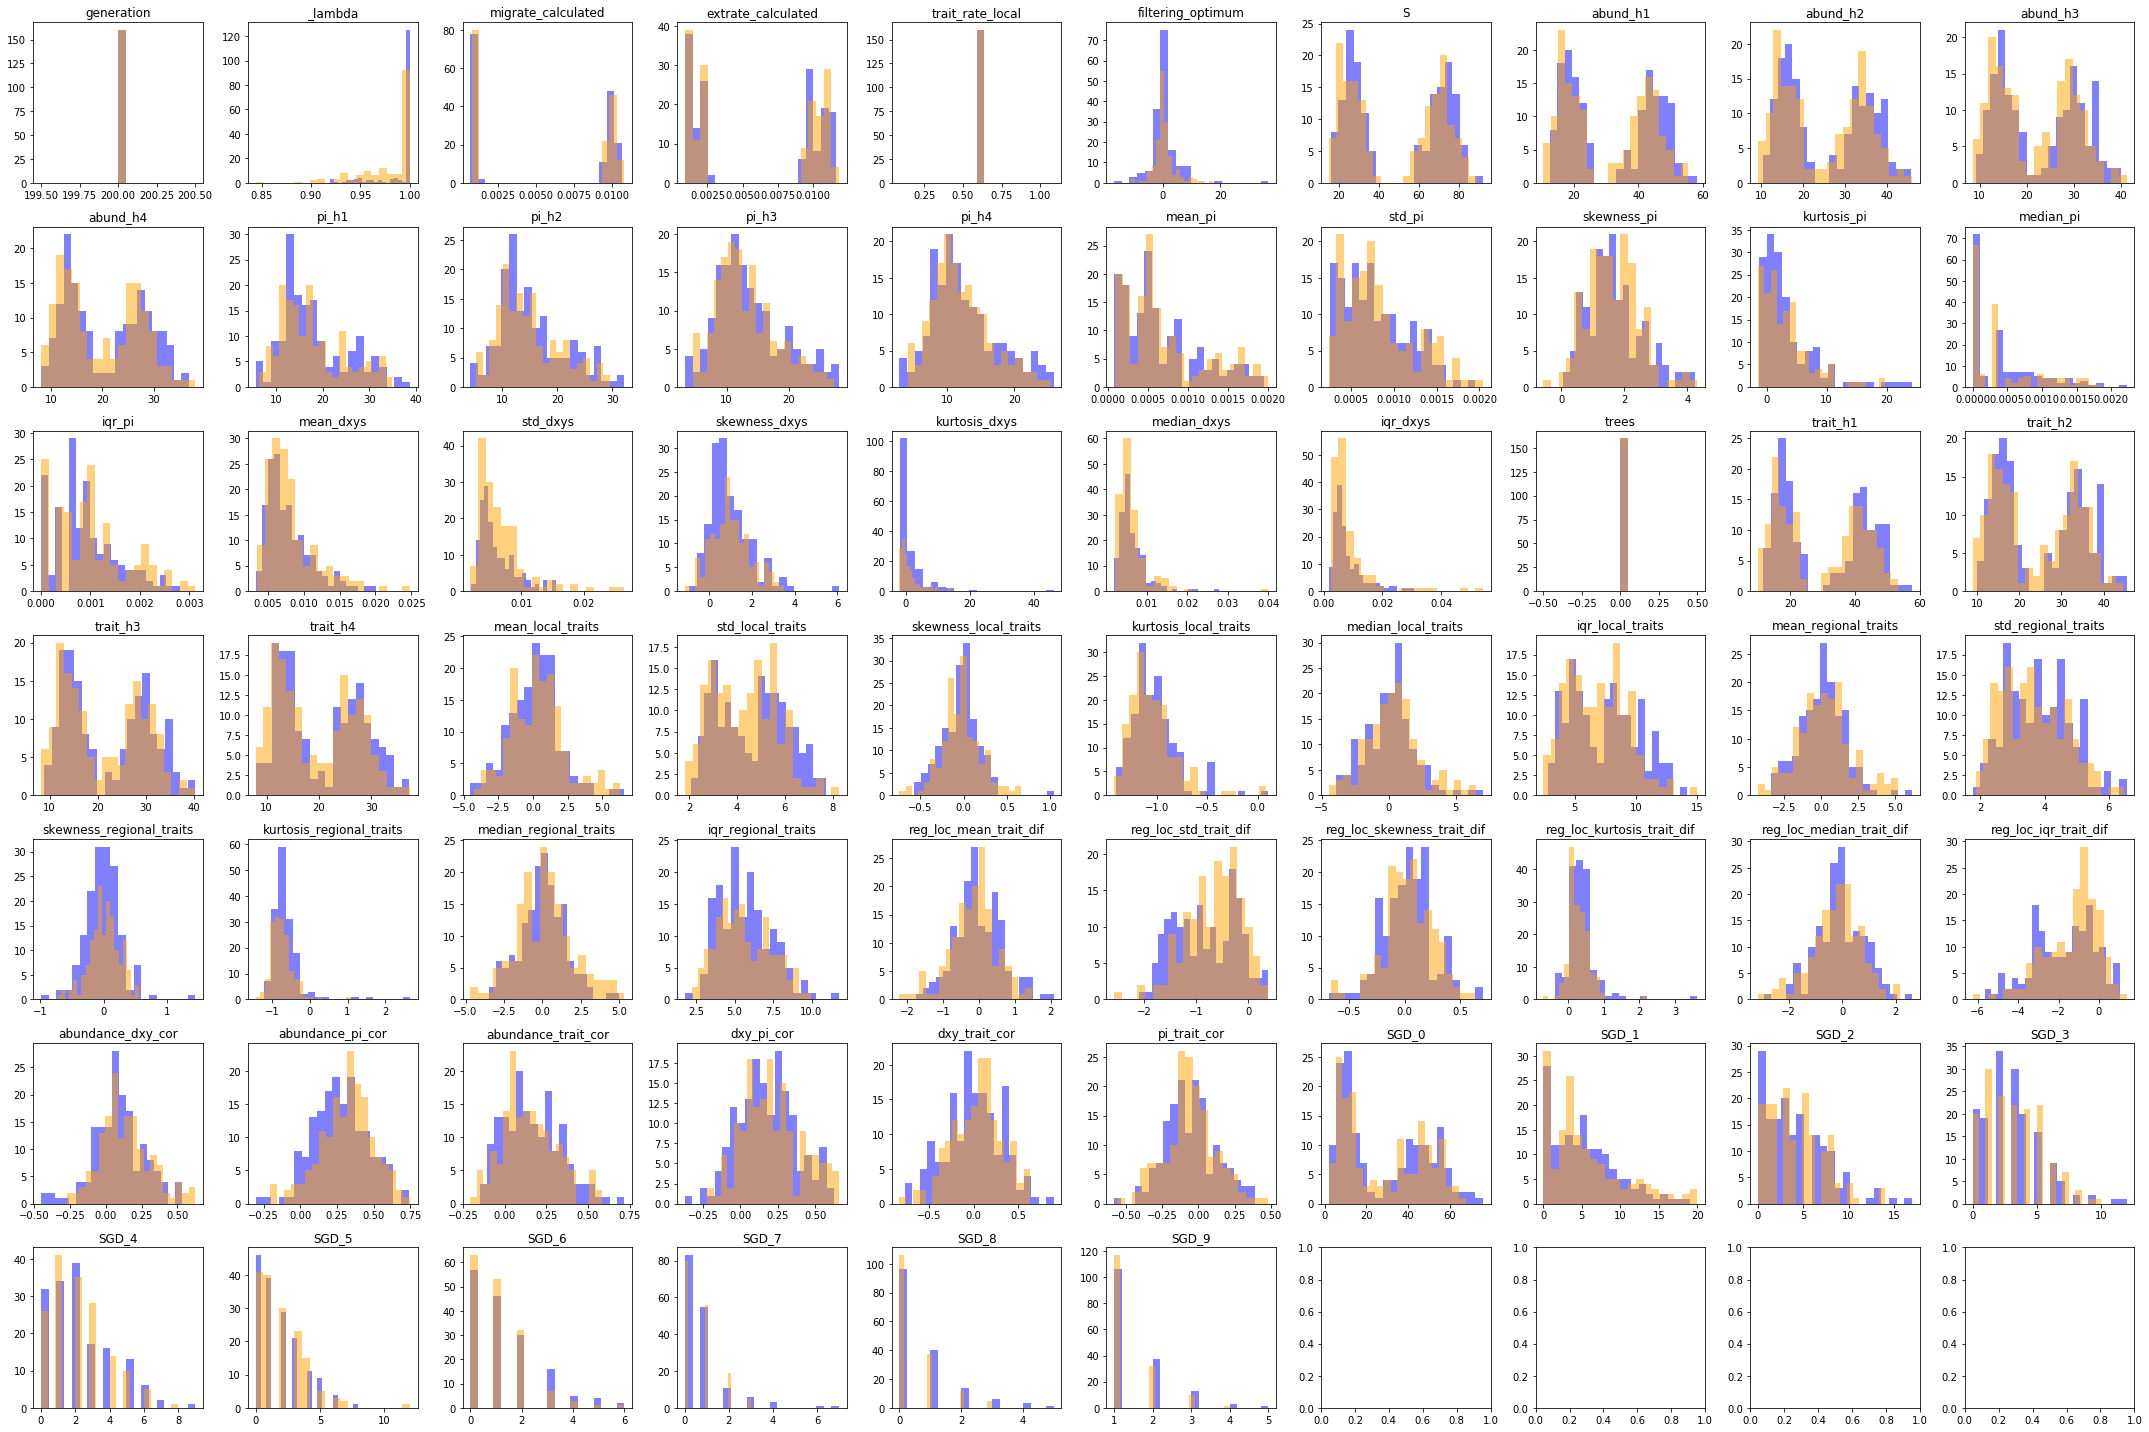

In [4]:
# Pairwise
# Array is blue
# No array is orange
fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(arr_pw.columns)[15:], axs):
    ax.hist(arr_pw[p], color='blue', bins=20, alpha=0.5)
    ax.hist(noarr_pw[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()

In [6]:
print(arr_mean.shape)
mean = pd.DataFrame.append(arr_mean, noarr_mean)
neutral = pd.DataFrame.append(arr_neutral, noarr_neutral)
filtering = pd.DataFrame.append(arr_filtering, noarr_filtering)
pw = pd.DataFrame.append(arr_pw, noarr_pw)
print(mean.shape)

(160, 81)
(320, 81)


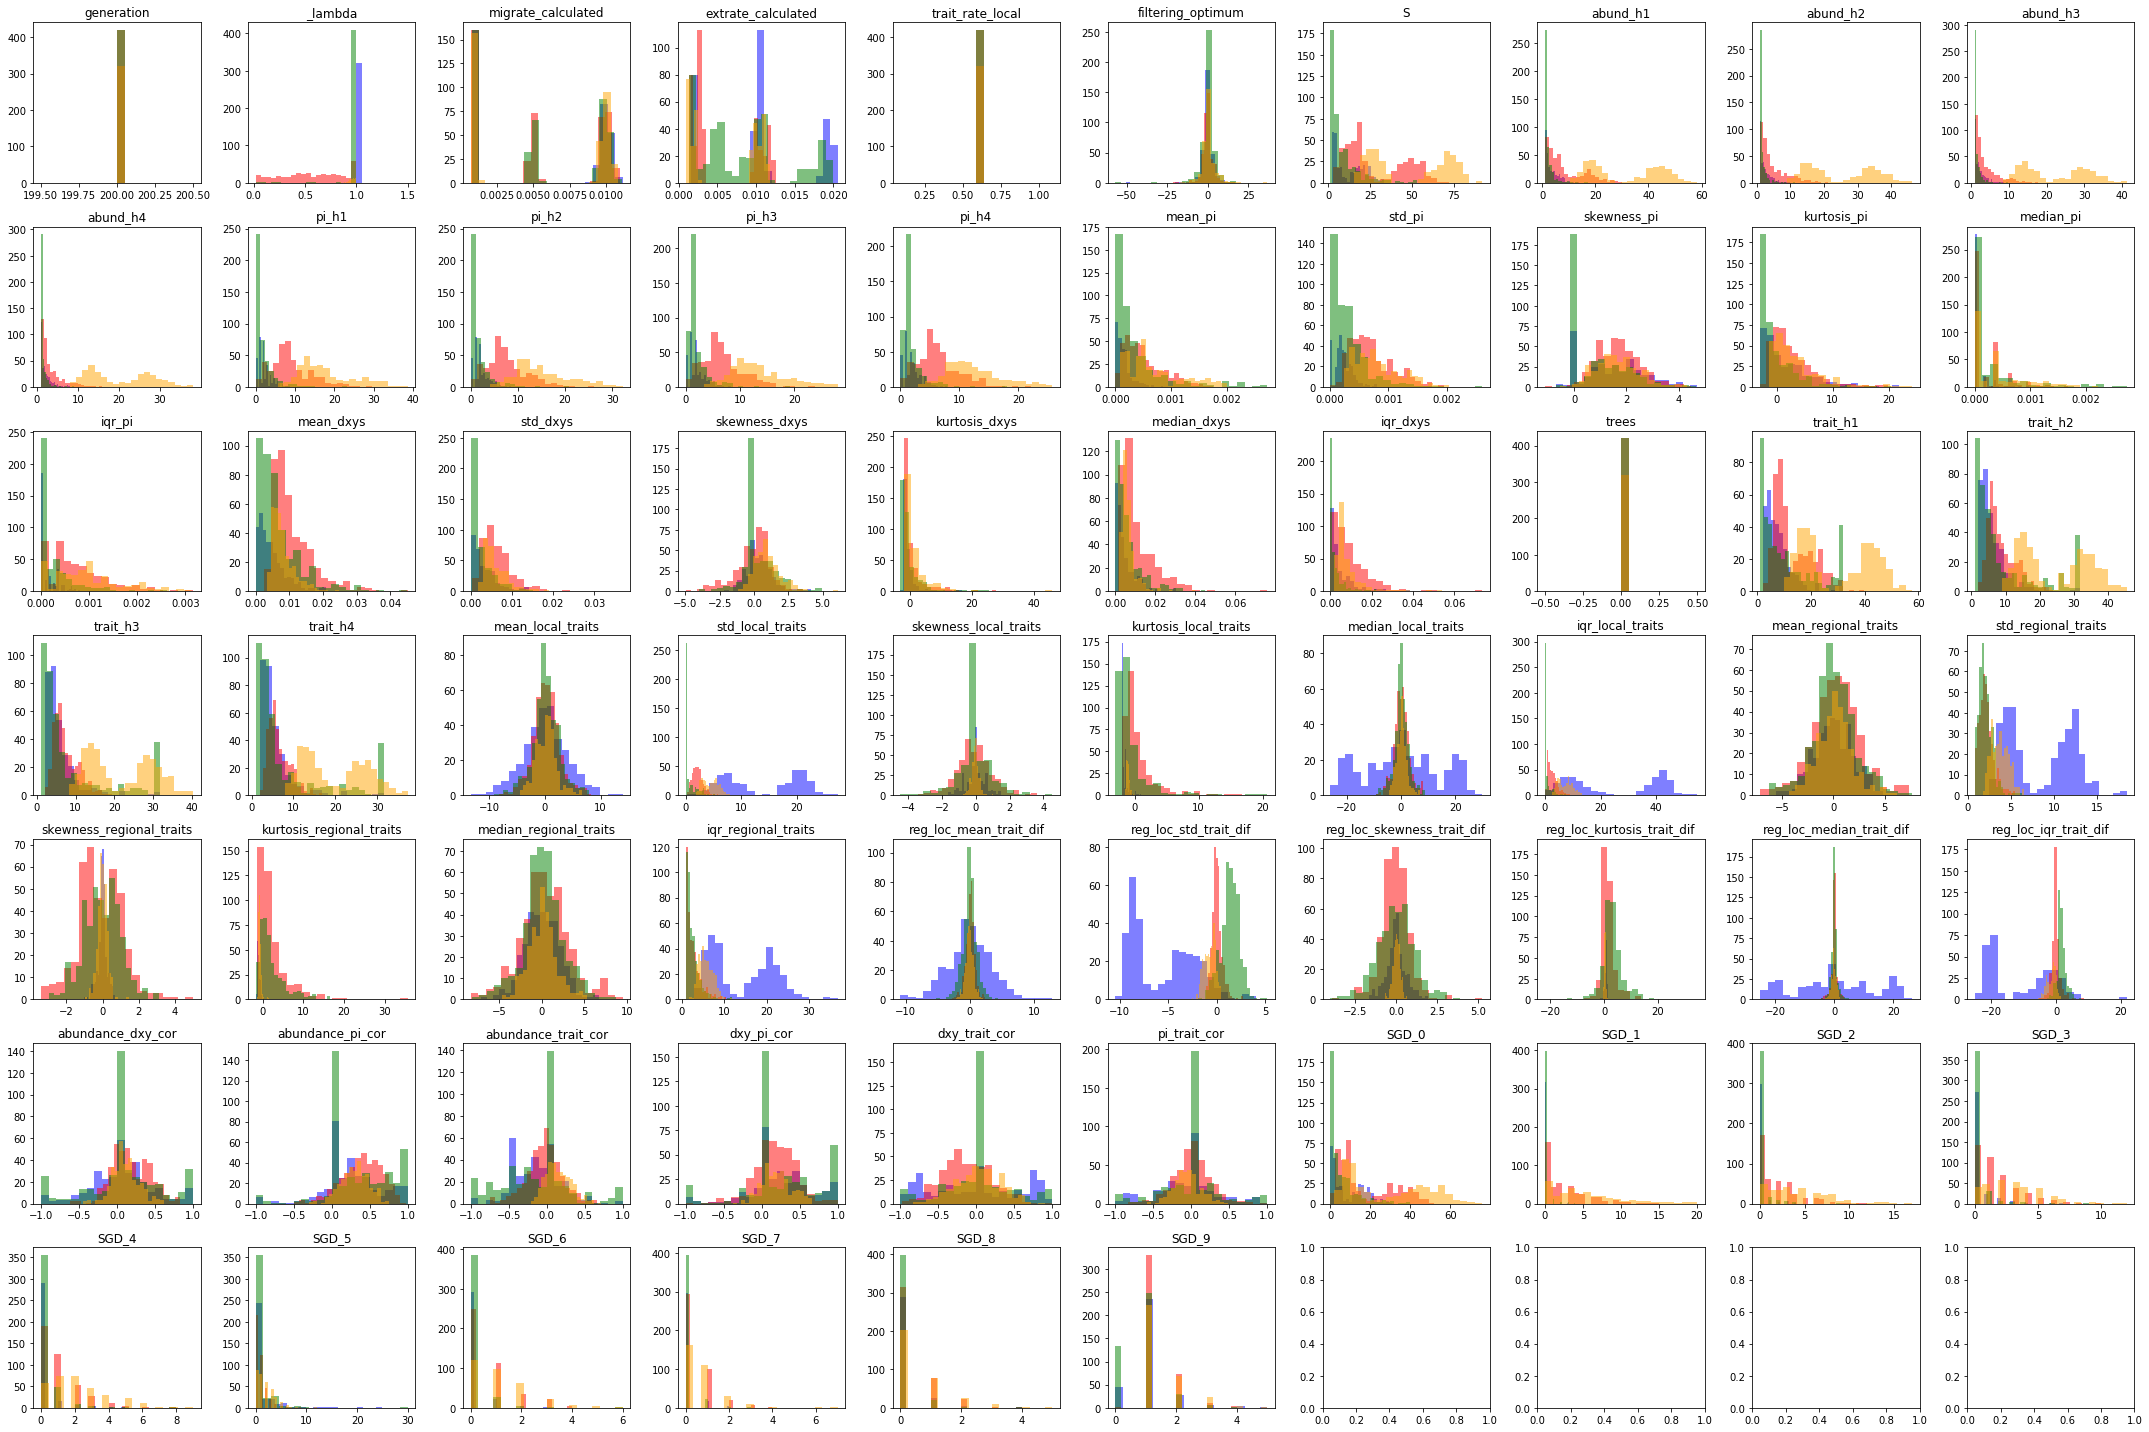

In [7]:
# ALL

fig, ax = plt.subplots(7, 10, figsize=(30, 20))
axs = fig.axes
for p, ax in zip(list(arr_pw.columns)[15:], axs):
    ax.hist(mean[p], color='blue', bins=20, alpha=0.5)
    ax.hist(neutral[p], color='red', bins=20, alpha=0.5)
    ax.hist(filtering[p], color='green', bins=20, alpha=0.5)
    ax.hist(pw[p], color='orange', bins=20, alpha=0.5)
    ax.set_title(p)
fig.tight_layout()